<a href="https://colab.research.google.com/github/trinhvanypro1/-DataAnalystDeepLearning/blob/main/Lab7_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
#Hàm để hieenrt hị các tấm ảnh
import matplotlib.pyplot as plt
#Chọn ngẫu nhiên các tấm ảnh
import random
#Load dữ liệu trong tập mẫu
from keras.datasets import mnist
#Hàm xây dựng mô hình neural
#Thêm 1 lớp, thêm hàm kích haojt activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/carpricesdata.csv')
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23,46986,1165,90,1,2000,3,13500
1,23,72937,1165,90,1,2000,3,13500
2,24,41711,1165,90,1,2000,3,13950
3,26,48000,1165,90,0,2000,3,14950
4,30,38500,1170,90,0,2000,3,13750


In [3]:
Prediction_Obj = ['Age','KM', 'Weight','HP','MetColor','CC','Doors']
Prediction_Values = ['Price']

In [4]:
x=pd.DataFrame(df,columns=Prediction_Obj)
y=pd.DataFrame(df,columns=Prediction_Values)

In [5]:
#Khởi tạo mô hình
model=Sequential()
#Add vào lớp input có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(7,input_dim=7,kernel_initializer='normal'))
model.add(Activation('relu'))

In [6]:
#add vào lớp hidden sẽ tự động lấy đầu vào của lớp input, giá trị hieden có thể thay đổi
model.add(Dense(7,kernel_initializer='normal'))
model.add(Activation('relu'))

In [7]:
#add vào lớp đầu ra, bắc buộc là 10 vì số lượng 0-9 là 10 số
model.add(Dense(1,kernel_initializer='normal'))
#Dùng hàm softmax vì đầu ra là 10 lớp, với các bài toán classification(phân loại) do output có 10 lớp nên lớn hơn 2 ta dùng hàm softmax
model.add(Activation('softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 activation (Activation)     (None, 7)                 0         
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 activation_1 (Activation)   (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable pa

In [8]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [9]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

x=PredictorScalerFit.transform(x)
y=TargetVarScalerFit.transform(y)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [11]:
history=model.fit(x_train, y_train,batch_size=20, epochs=5, verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 950ms/step - loss: 1.6587 - accuracy: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 1.6587 - accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 1.6587 - accuracy: 0.0000e+00
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 1.6587 - accuracy: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 1.6587 - accuracy: 0.0000e+00


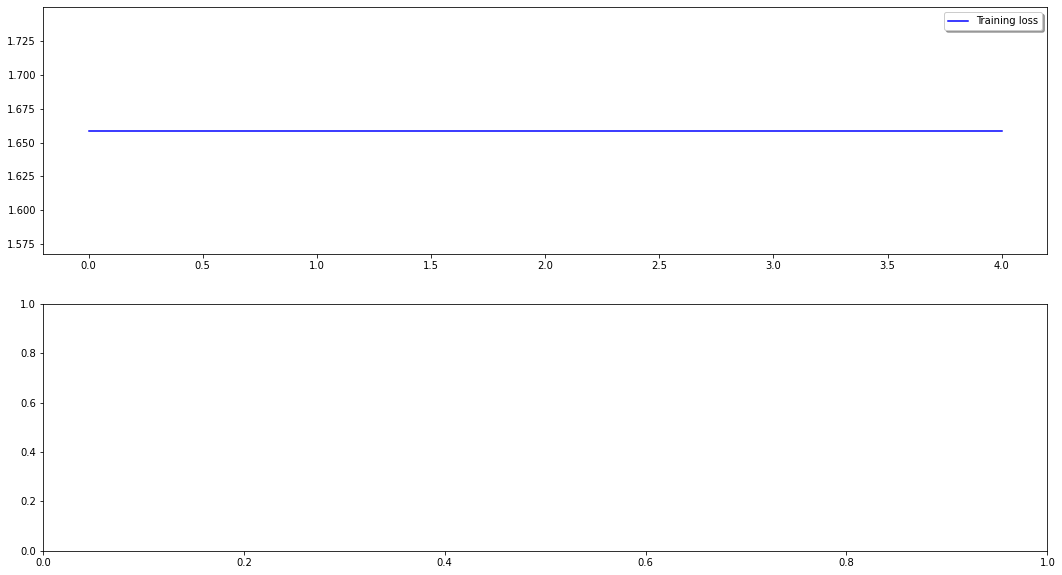

In [12]:
fig, ax = plt.subplots(2,1,figsize=(18,10))
ax[0].plot(history.history['loss'], color='b',label='Training loss')
legend=ax[0].legend(loc='best',shadow=True)

In [13]:
#Giá trị thực tế được lưu ở tập t_test
predicted_price=model.predict(x_test)

In [14]:
predicted_price=TargetVarScalerFit.inverse_transform(predicted_price)
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
test_data=PredictorScalerFit.inverse_transform(x_test)

In [15]:
testdata=pd.DataFrame(data=test_data, columns=Prediction_Obj)
testdata['Price']=y_test_orig
testdata['PredictedPrice']=predicted_price

In [16]:
testdata

,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,23.0,72937.0,1165.0,90.0,1.0,2000.0,3.0,13500.0,14467.214844
1,30.0,38500.0,1170.0,90.0,0.0,2000.0,3.0,13750.0,14467.214844
